# <font color="Brown">Multiple Linear Regression  - Shared Bikes Demand Prediction</font>

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


###  <font color="Brown">1. Importing libraries and understanding the data</font>

In [1]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [2]:
## reading data and looking at the structure through first few records
dt = pd.read_csv("day.csv")
dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## number of records and its info

print(dt.shape)
print(dt.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4]:
# checking for nulls
dt.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
## reviewing statistical information on dataset
dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



#### 2. From data dictionary and description, few categorical variables represented in numerics which need to be fixed


###  <font color="Brown">2. Updating or Fixing Data</font>

In [6]:
#### 1. Instant represents just the record number. so can be dropped as insignificant in modelling
#### 2. Date column dteday can be dropped since we have no need for it for modelling

dt.drop(columns=['instant','dteday'],axis=1,inplace=True)

In [7]:
# variable season represents the nature season on any given day. values possible ((1:spring, 2:summer, 3:fall, 4:winter))

dt.season = dt.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [8]:
#print(dt.season.unique())
#print(dt.season.value_counts())

dt.groupby(['season'],sort=False)['cnt'].sum()

season
spring     469514
summer     918589
fall      1061129
winter     841613
Name: cnt, dtype: int64

In [9]:
# variable month reprenting the month name of the years

dt.mnth = dt.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [10]:
#dt.mnth.unique()
dt.groupby(['mnth'],sort=False)['cnt'].sum()

mnth
Jan    134933
Feb    149518
Mar    228920
Apr    269094
May    331686
Jun    346342
Jul    344948
Aug    351194
Sep    345991
Oct    322352
Nov    254831
Dec    211036
Name: cnt, dtype: int64

In [11]:
# weekday represents days of week

dt.weekday = dt.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

In [12]:
dt.groupby(['weekday'],sort=False)['cnt'].sum()

weekday
Mon    477807
Tue    444027
Wed    455503
Thu    469109
Fri    471214
Sat    485395
Sun    487790
Name: cnt, dtype: int64

In [13]:
# weathersit : weather situation on any day with possible values:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

dt.weathersit = dt.weathersit.map({1:'Clear_Partly Cloudy',2:'Mist_Cloudy',3:'Light snow_rain_storm',4:'Heavy Rain_snow_storm'})

In [14]:
#dt.weathersit.value_counts()
dt.groupby(['weathersit'],sort=False)['cnt'].sum()

weathersit
Mist_Cloudy               995024
Clear_Partly Cloudy      2257952
Light snow_rain_storm      37869
Name: cnt, dtype: int64

In [15]:
# yr represents the calender year

dt.yr = dt.yr.map({0:2018,1:2019})

In [16]:
dt.groupby(['yr'],sort=False)['cnt'].sum()

yr
2018    1243103
2019    2047742
Name: cnt, dtype: int64

In [17]:
dt.groupby(['workingday'],sort=False)['cnt'].sum()

workingday
0    1000269
1    2290576
Name: cnt, dtype: int64

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [19]:
# taking a look at the refined dataset
dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Mon,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Tue,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Wed,1,Clear_Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Thu,1,Clear_Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Fri,1,Clear_Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  <font color="Brown">3. Visualizing Data</font>

In [20]:
# seperating into numeric and categorical vars for ease

num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

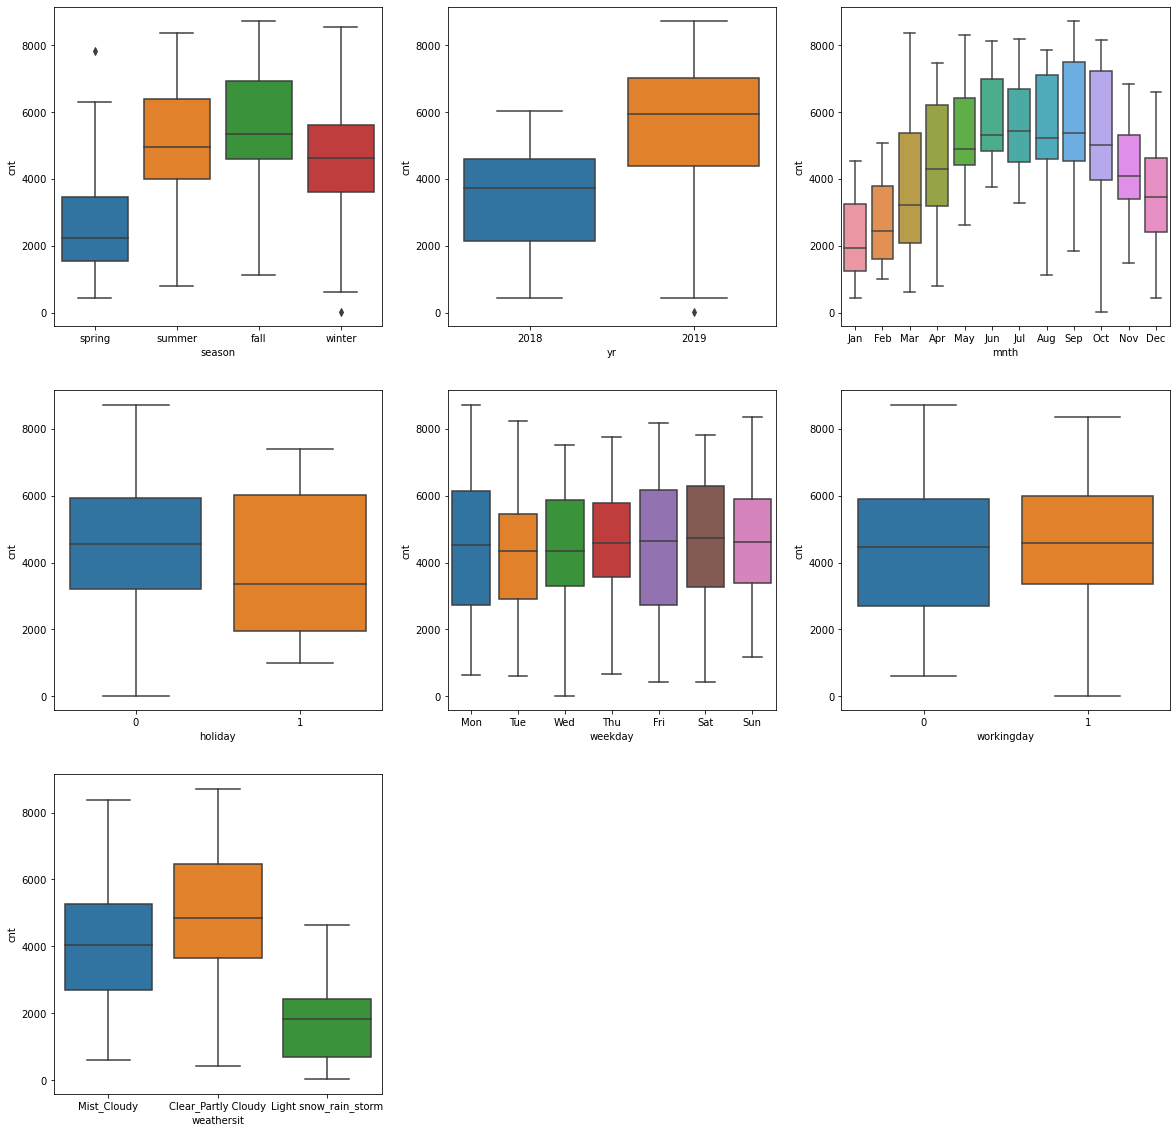

In [21]:
## boxplot analysis for categorical vars against target var cnt

plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dt)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dt)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = dt)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = dt)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dt)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dt)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dt)

plt.show()

#### <font color="Brown"> Q1. Inference on Categorical Variables </font>

- **`yr`** : seeing a huge growth in the no. of users in 2019 (2047742) when compared with 2018 (1243103) as visible from plot
- **`season`** : fall and summer account for maximum number of users availing services as compared with winter and spring (as snow and rain tend be difficult for bike rides in general)
- **`mnth`** : Aug, Jun, Sep, Aug attracts maximum people where the harsh winter days (Jan, Feb, Dec) see less people
- **`holiday`** : working days attract more people towards the service as compared to holidays
- **`weekday`** : one interesting insight here is that people using bike services on weekends are maximum. Implying that maximum people generally run household errands or fun activities on weekends and thus only explanation for these high numbers on weekends
- **`workingdays`** : on comparison w.r.t. 5 working days and 2 non-working days, for obvious reasons, people using for weekdays would come out to be higher
- **`weather`** : favourable weather attracts more people to use bike services as visible from the plot ( clear skies has maximum people enjoying bike services as compared wit cloudy and light rain or snow. Heavy rain and snow times have no user availing bike services as for obvious reasons

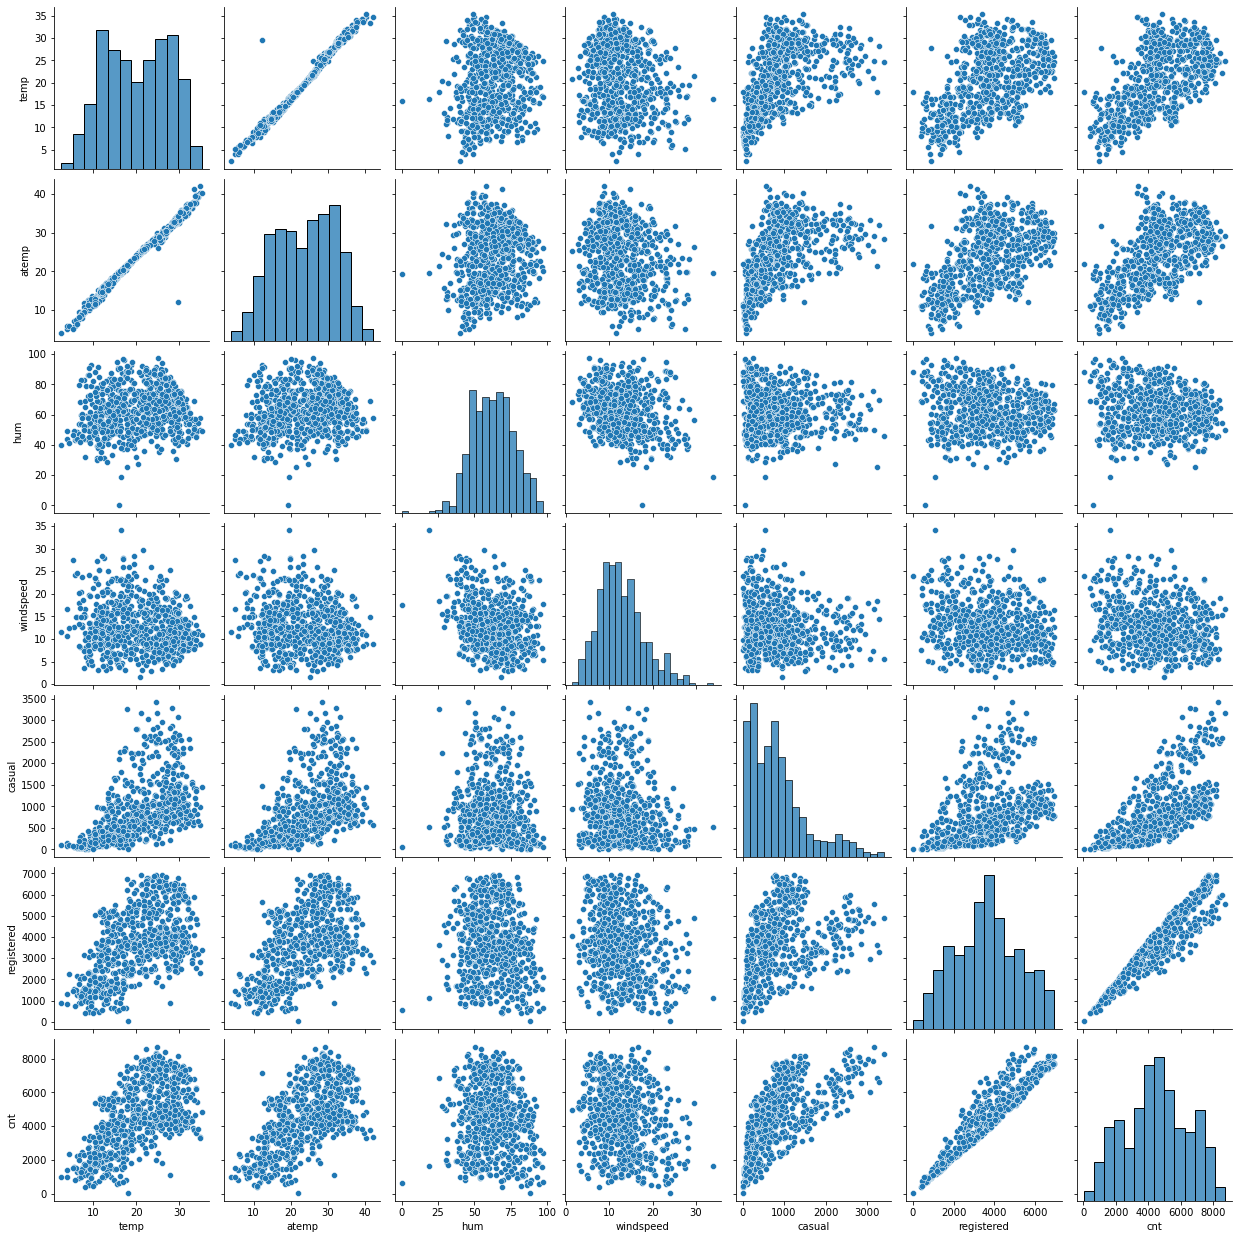

In [22]:
# pairplot analysis for numeric features against cnt

sns.pairplot(dt[num_vars])
plt.show()

- temp and atemp showing almost perfect linear relation between them
- casual indicating good and registered even better relation w.r.t. cnt

`confirming these with the correlation matrix and their regplots`

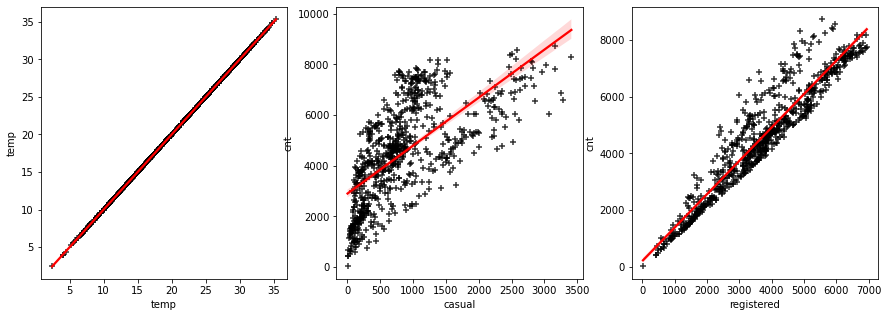

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.regplot(x='temp',y='temp',data=dt,marker='+',scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.subplot(1,3,2)
sns.regplot(x='casual',y='cnt',data=dt,marker='+',scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.subplot(1,3,3)
sns.regplot(x='registered',y='cnt',data=dt,marker='+',scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show()

In [24]:
# correlation matrix
dt[num_vars].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


In [25]:
## dropping off these variables from further considerations

dt.drop(columns=['atemp','casual','registered'],axis=1,inplace=True)

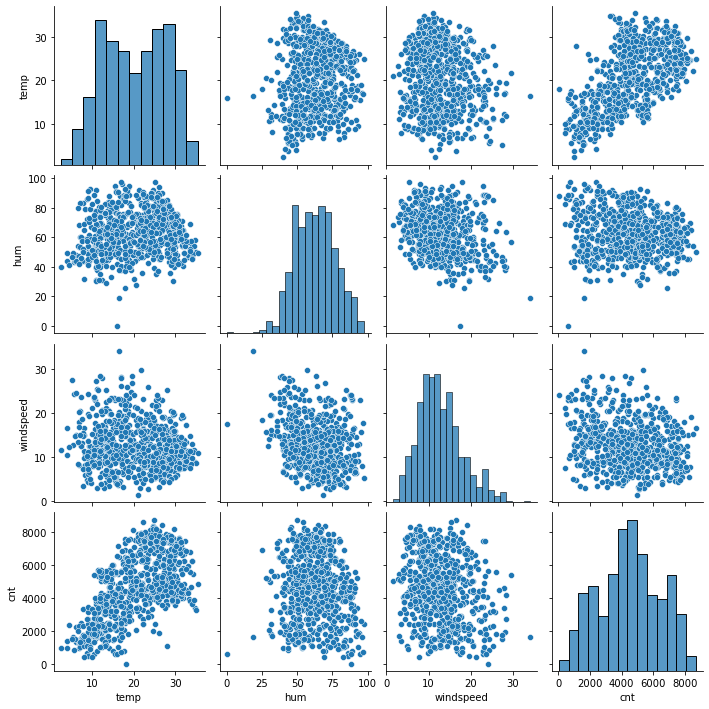

In [26]:
## looking at pair plots for remaining numerical features

sns.pairplot(dt[['temp','hum','windspeed','cnt']])
plt.show()

#### temp is showing +ve relation w.r.t cnt whereas hum and windspeed indicating -ve relation with target variable

#### confirming the above using their regplots and corrleation values

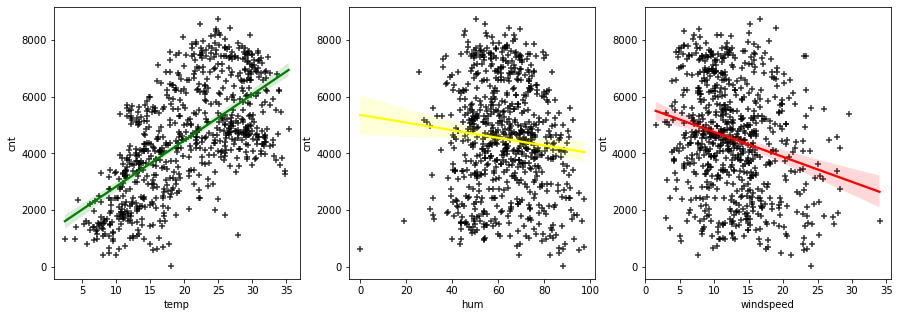

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.regplot(x='temp',y='cnt',data=dt,marker='+',scatter_kws={"color": "black"}, line_kws={"color": "green"})

plt.subplot(1,3,2)
sns.regplot(x='hum',y='cnt',data=dt,marker='+',scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

plt.subplot(1,3,3)
sns.regplot(x='windspeed',y='cnt',data=dt,marker='+',scatter_kws={"color": "black"}, line_kws={"color": "red"})


plt.show()

<AxesSubplot:>

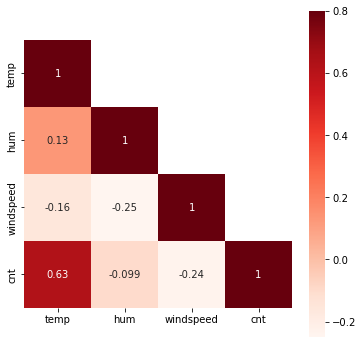

In [28]:
# heatmap
mask = np.array(dt[['temp','hum','windspeed','cnt']].corr())
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(6,6))
sns.heatmap(dt[['temp','hum','windspeed','cnt']].corr(),annot=True,cmap='Reds',mask=mask,vmax=.8,square=True)


###  <font color="Brown">4. Data Preparation or Dummy variable creation</font>

In [29]:
dt.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,0,Mist_Cloudy,14.902598,69.6087,16.652113,801


In [30]:
# need dummy variables for month, weekday, season, weathersit independent vars

dum_vars=['season','mnth','weekday','weathersit']

In [31]:
# creating temp dataframe to store all dummy vars

dum_df=pd.get_dummies(dt[dum_vars],drop_first=True)

In [32]:
#merge to form full dataset with dummies

dt=pd.concat([dt,dum_df],axis=1)

In [33]:
dt.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Light snow_rain_storm', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [34]:
## drop original features for which dummies are available

dt=dt.drop(dum_vars,axis=1)

In [35]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   hum                               730 non-null    float64
 5   windspeed                         730 non-null    float64
 6   cnt                               730 non-null    int64  
 7   season_spring                     730 non-null    uint8  
 8   season_summer                     730 non-null    uint8  
 9   season_winter                     730 non-null    uint8  
 10  mnth_Aug                          730 non-null    uint8  
 11  mnth_Dec                          730 non-null    uint8  
 12  mnth_Feb

###  <font color="Brown">5. Splitting Train and Test Datasets and rescaling the train numeric feature</font>

##### train and test data split ratio 7:3

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(dt, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
# confirming test and train record count
print("Train set Dimensions : ", df_train.shape)
print("Test set dimensions  : ", df_test.shape)

Train set Dimensions :  (510, 29)
Test set dimensions  :  (219, 29)


##### rescaling numeric features to same scale

In [38]:
scaler = MinMaxScaler()

In [39]:
## collating features to rescale and transforming them
sc_vars = ['temp','hum','windspeed','cnt']

df_train[sc_vars]=scaler.fit_transform(df_train[sc_vars])

In [40]:
# checking statistics for rescaled features
df_train[sc_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

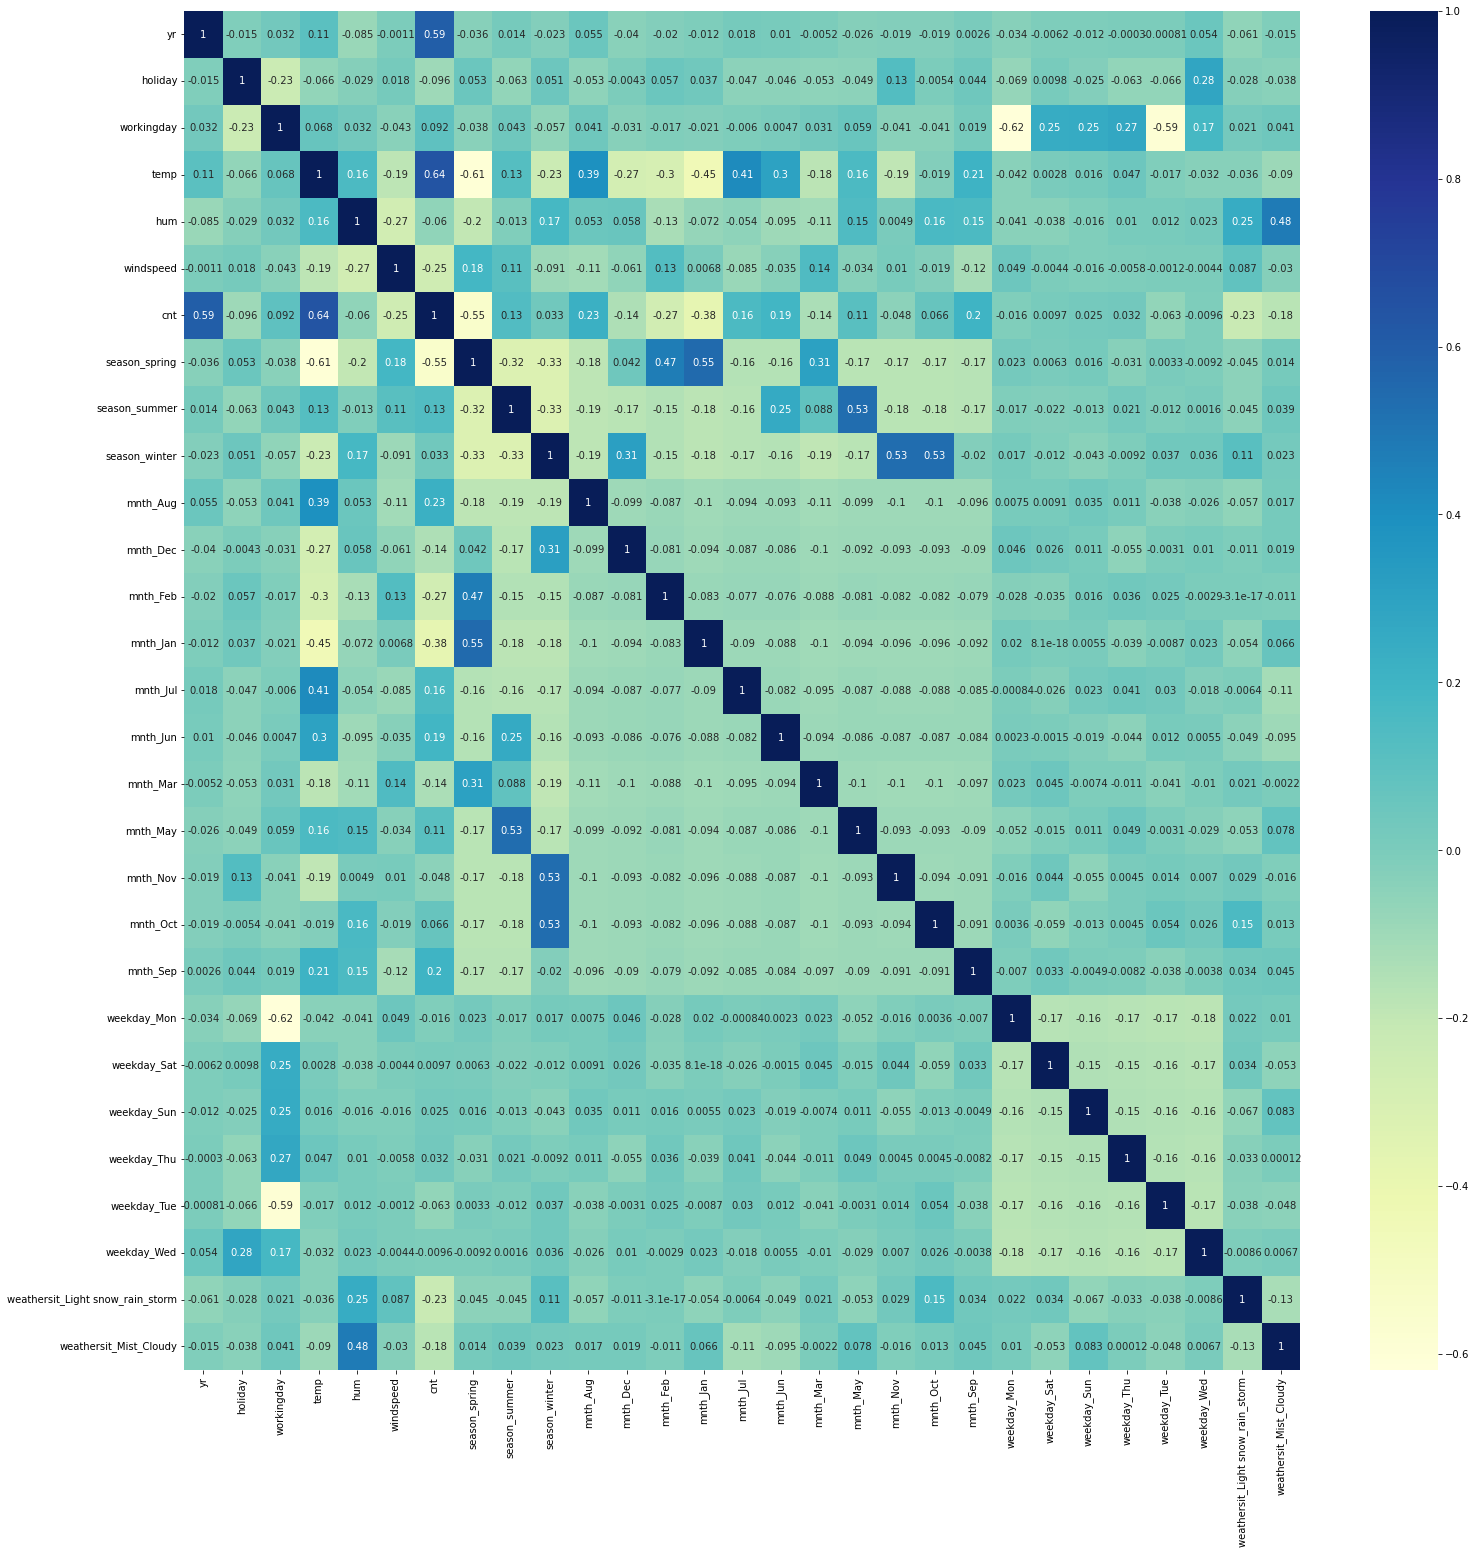

In [41]:
## check corr now for train dataset

plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

In [42]:
## divinding into X and y for model

y_train = df_train.pop('cnt')
X_train = df_train

###  <font color="Brown">6. Model Building</font>

##### Keeping all features and building model

In [43]:
# S1: Add a constant
X_train_lm = sm.add_constant(X_train)

# S2: Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# S3: Check the parameters obtained
lr.params

const                              -374.484690
yr                                    0.232116
holiday                             -93.675179
workingday                          -93.588253
temp                                  0.450562
hum                                  -0.151340
windspeed                            -0.186453
season_spring                        -0.048159
season_summer                         0.038725
season_winter                         0.105847
mnth_Aug                              0.014404
mnth_Dec                             -0.045586
mnth_Feb                             -0.032282
mnth_Jan                             -0.062777
mnth_Jul                             -0.040350
mnth_Jun                             -0.002972
mnth_Mar                              0.001045
mnth_May                              0.023940
mnth_Nov                             -0.041851
mnth_Oct                              0.007534
mnth_Sep                              0.081060
weekday_Mon  

In [44]:
## model summary for performance evaluation
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          8.74e-182
Time:                        22:59:06   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             -374.4847     13.004    -28.797      0.000    -400.037    -348.932
yr                                   0.2321      0.008     28.820      0.000       0.216       0.248
holiday                            -93.6752      3.250    -28.819      0.000    -100.062     -87.288
workingday                         -93.5883      3.251    -28.784      0.000     -99.977     -87.200
temp                                 0.4506      0.046      9.734      0.000       0.360       0.542
hum                                 -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                           -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring                       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer                        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter                        0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug                             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                            -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                            -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                            -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                            -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                            -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                             0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                             0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                            -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                             0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                             0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon                        -93.5834      3.251    -28.785      0.000     -99.971     -87.195
weekday_Sat                         -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun                          0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thu                         -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tue                        -93.6379      3.252    -28.798      0.000    -100.027     -87.249
weekday_Wed                         -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_Light snow_rain_storm    -0.2574      0.02

###### We have R2 value of `84.5%` which seems pretty good. But we have some variables indicating high p-values. So let's try with RFE and drop some irrelevant features to analyze the impact

#### Eliminating features with RFE and building model

In [45]:
# RFE with 15 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


In [46]:
# features chosen from all

rfe15 = X_train.columns[rfe.support_]
rfe15

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Light snow_rain_storm', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [47]:
# features rejected

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [48]:
# Subsetting training data for 15 selected columns
X_train_rfe15 = X_train[rfe15]

# Add a constant to the model
X_train_rfe15 = sm.add_constant(X_train_rfe15)
X_train_rfe15.head()

# Fitting the model with 15 variables
lm = sm.OLS(y_train, X_train_rfe15).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          2.31e-191
Time:                        22:59:06   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#####  <font color="Brown">Inference</font>

- p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model.
- R2 measure w.r.t both models
    - with all features : 84.5
    - with 15 RFE selected features : 84.4
    
So, moving ahead with these features and checking for multi-collinearity among these vars


In [49]:
## VIF

vif = pd.DataFrame()
X_vif = X_train[rfe15]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,83.86
4,hum,39.56
3,temp,25.41
6,season_spring,6.70
2,workingday,5.81
5,windspeed,5.53
8,season_winter,4.77
7,season_summer,3.49
14,weathersit_Mist_Cloudy,2.39
12,weekday_Mon,2.11


##### RFE with 10 features

In [50]:
# RFE with 10 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=10,step=1)

rfe.fit(X_train, y_train)

# features selected
rfe10 = X_train.columns[rfe.support_]

# Subsetting training data for selected columns
X_train_rfe10 = X_train[rfe10]

# Add a constant to the model
X_train_rfe10 = sm.add_constant(X_train_rfe10)
X_train_rfe10.head()

# Fitting the model
lm = sm.OLS(y_train, X_train_rfe10).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.53e-184
Time:                        22:59:06   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#####  <font color="Brown">Inference</font>

- p-value for all the variables is < 0.05 . Hence, we can keep all the columns and proceed with the model.
- R2 measure w.r.t all models
    - with all features : 84.5
    - with 15 RFE selected features : 84.4
    - with 10 RFE selected features : 82.6
    
So, moving ahead with these features and checking for multi-collinearity


In [51]:
## VIF

vif = pd.DataFrame()
X_vif = X_train[rfe10]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,55.22
3,hum,26.10
2,temp,18.82
4,windspeed,5.27
5,season_spring,3.34
6,season_winter,2.32
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_Light snow_rain_storm,1.14
1,holiday,1.04


##### RFE with 7 features

In [52]:
# RFE with 7 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=7,step=1)

rfe.fit(X_train, y_train)

# features selected
rfe7 = X_train.columns[rfe.support_]

# Subsetting training data for selected columns
X_train_rfe7 = X_train[rfe7]

# Add a constant to the model
X_train_rfe7 = sm.add_constant(X_train_rfe7)

# Fitting the model
lm = sm.OLS(y_train, X_train_rfe7).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          2.34e-178
Time:                        22:59:06   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#####  <font color="Brown">Inference</font>

- p-value for all the variables is < 0.05 .
- R2 measure w.r.t all models
    - with all features : 84.5
    - with 15 RFE selected features : 84.4
    - with 10 RFE selected features : 82.6
    - with 07 RFE selected features : 81.1
    
So, moving ahead with these features and checking for multi-collinearity


In [53]:
## VIF

vif = pd.DataFrame()
X_vif = X_train[rfe7]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,46.22
2,hum,25.50
1,temp,12.84
3,windspeed,5.20
4,season_spring,2.17
5,mnth_Jul,1.35
6,weathersit_Light snow_rain_storm,1.14


In [54]:
## yr has high VIF value so try removing the yr and proceed with model ===> resulted in huge R2 value drop (57)
## dropping temp also lead to significant drop in R2 value (70.6)
## so trying with next high VIF feature i.e. hum

X_train_rfe7.drop("hum",axis=1,inplace=True)
X_train_rfe7.head()

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_Light snow_rain_storm
653,1.0,2019,0.509887,0.300794,0,0,0
576,1.0,2019,0.815169,0.264686,0,1,0
426,1.0,2019,0.442393,0.255342,1,0,0
728,1.0,2019,0.245101,0.663106,1,0,0
482,1.0,2019,0.395666,0.188475,0,0,0


In [55]:
# model with 6 features
X_train_rfe7 = sm.add_constant(X_train_rfe7)

# Fitting the model
lm = sm.OLS(y_train, X_train_rfe7).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.37e-168
Time:                        22:59:07   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#####  <font color="Brown">Inference</font>

- p-value for all the variables is < 0.05 .
- R2 measure w.r.t all models
    - with all features : 84.5
    - with 15 RFE selected features : 84.4
    - with 10 RFE selected features : 82.6
    - with 07 RFE selected features : 81.1
    - with 06 selected features : 79.1
    
So, moving ahead with these features and checking for multi-collinearity


In [56]:
## VIF

vif = pd.DataFrame()
X_vif = X_train[rfe7].drop('hum',axis=1)
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,18.94
1,temp,12.73
2,windspeed,4.82
3,season_spring,2.15
4,mnth_Jul,1.33
5,weathersit_Light snow_rain_storm,1.05


###### Conclusion:
- Features yr and temp cannot be dropped despite having high VIF value for it would also drop model performance significantly

So, proceeding further after choosing this model built with 6 vars as our final model

###  <font color="Brown">7. Residual Analysis</font>

In [57]:
y_train_cnt = lm.predict(X_train_rfe7)

C:\Users\Siyaram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


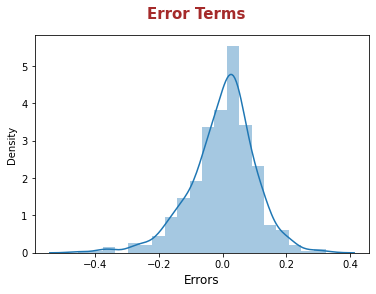

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 15,fontweight ="bold",color='brown')
plt.xlabel('Errors', fontsize = 12)

plt.show()

###  <font color="Brown">8. Making Predictions on Test Set and Evaluating model</font>

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                219 non-null    int64  
 1   holiday                           219 non-null    int64  
 2   workingday                        219 non-null    int64  
 3   temp                              219 non-null    float64
 4   hum                               219 non-null    float64
 5   windspeed                         219 non-null    float64
 6   cnt                               219 non-null    int64  
 7   season_spring                     219 non-null    uint8  
 8   season_summer                     219 non-null    uint8  
 9   season_winter                     219 non-null    uint8  
 10  mnth_Aug                          219 non-null    uint8  
 11  mnth_Dec                          219 non-null    uint8  
 12  mnth_Fe

In [60]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light snow_rain_storm,weathersit_Mist_Cloudy
184,2018,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,2019,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,2018,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,2018,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,2018,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
## numerical features to be rescaled and rescaling them

sc_vars_test = ['temp','hum','windspeed','cnt']

df_test[sc_vars_test]=scaler.fit_transform(df_test[sc_vars_test])

In [62]:
## reviewing statiscal params post scaling variables

df_test[sc_vars_test].describe()

,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.546312,0.508750,0.418870,0.516216
std,0.249189,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000
25%,0.328479,0.358469,0.283817,0.359882
50%,0.546045,0.494200,0.402533,0.520241
75%,0.759735,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000


In [63]:
## splitting test dataset in X and y sets
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light snow_rain_storm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [65]:
## columns final model was based on
rfecols = X_train_rfe7.drop('const',axis=1).columns

In [66]:
rfecols

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_Light snow_rain_storm'],
      dtype='object')

In [67]:
## filter out these features from the test dataset
X_test_rfe = X_test[rfecols]

In [68]:
X_test_rfe.head()

,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_Light snow_rain_storm
184,2018,0.837241,0.149393,0,1,0
535,2019,0.911423,0.231142,0,0,0
299,2018,0.496221,0.443398,0,0,0
221,2018,0.890387,0.449707,0,0,0
152,2018,0.821739,0.682387,0,0,0


In [69]:
# Adding constant to test dataset
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             219 non-null    float64
 1   yr                                219 non-null    int64  
 2   temp                              219 non-null    float64
 3   windspeed                         219 non-null    float64
 4   season_spring                     219 non-null    uint8  
 5   mnth_Jul                          219 non-null    uint8  
 6   weathersit_Light snow_rain_storm  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [70]:
# Making predictions
y_test_pred = lm.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

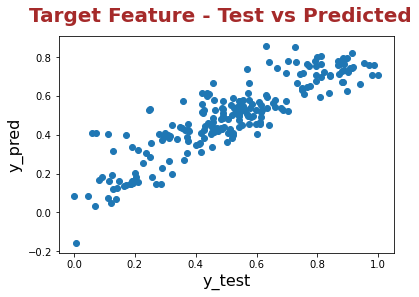

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Target Feature - Test vs Predicted', fontsize = 20, fontweight ="bold",color='brown')
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 16)  

#### <font color='brown'> R-squared Score</font>

In [72]:
r2_score(y_test, y_test_pred)*100

76.46302652613728

###### r2 score on test set pretty close to r2 score on train set (79.3)